In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import os 
from tensorflow.keras.optimizers import RMSprop
%matplotlib inline

In [2]:
#build_dir = '/content/drive/MyDrive/deep learning lab/rps-cv-images'
build_dir = 'd:/Users/sf41/Desktop/Reg22244191158_DL Lab/rps-cv-images'
rock_dir = os.path.join(build_dir,'rock')
paper_dir = os.path.join(build_dir,'paper')
scissors_dir = os.path.join(build_dir,'scissors')
os.listdir(build_dir)

['paper', 'README_rpc-cv-images.txt', 'rock', 'scissors']

In [3]:
pd.DataFrame(data=[len(os.listdir(rock_dir)), len(os.listdir(paper_dir)), len(os.listdir(scissors_dir))], index=['Rock Image', 'Paper Image', 'Scissor Image'], columns=['Total Image'])
#pd.DataFrame(data=[len(os.listdir(rock_dir))], index=['Rock Image'], columns=['Total Image'])

,Total Image
Rock Image,726
Paper Image,712
Scissor Image,750


In [4]:
generator = ImageDataGenerator(
    rescale = 1/255.0,
    zoom_range = 0.25,
    rotation_range = 10,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.4
)
train_generator = generator.flow_from_directory(
    build_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb',
    subset = 'training'
)
val_generator = generator.flow_from_directory(
    build_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [5]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [7]:
class CallbackAcc(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.97):
            print("\nReached %2.2f%% accuracy, training has been stop" %(logs.get('accuracy')*100))
            self.model.stop_training = True
callbacks = CallbackAcc()

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
historyModel = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = val_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [callbacks])

Epoch 1/20
25/25 - 23s - loss: 1.1729 - accuracy: 0.3363 - val_loss: 1.0910 - val_accuracy: 0.3500
Epoch 2/20
25/25 - 18s - loss: 1.0718 - accuracy: 0.4437 - val_loss: 0.9562 - val_accuracy: 0.6562
Epoch 3/20
25/25 - 15s - loss: 0.8770 - accuracy: 0.6532 - val_loss: 0.8400 - val_accuracy: 0.6938
Epoch 4/20
25/25 - 15s - loss: 0.5790 - accuracy: 0.7766 - val_loss: 0.5223 - val_accuracy: 0.7937
Epoch 5/20
25/25 - 14s - loss: 0.4758 - accuracy: 0.8234 - val_loss: 0.4213 - val_accuracy: 0.8562
Epoch 6/20


In [ ]:
#uploaded = os.path.join(rock_dir,'7cNxwgrraQGeA1LA.png')
uploaded = os.path.join(rock_dir,'9JYn3D5vkXtrasPJ.png')

img = image.load_img(uploaded, target_size = (150, 150))

imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
images = np.vstack([x])

classes = model.predict(images, batch_size = 10)

print(classes)
if classes[0, 0] == 1:
    print('Paper')
elif classes[0, 1] == 1:
    print('Rock')
else:
    print('Scissors')

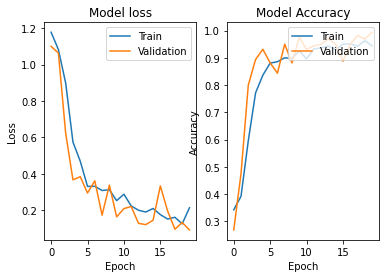

In [12]:
plt.subplot(1, 2, 1)
plt.plot(historyModel.history['loss'])
plt.plot(historyModel.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(historyModel.history['accuracy'])
plt.plot(historyModel.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()